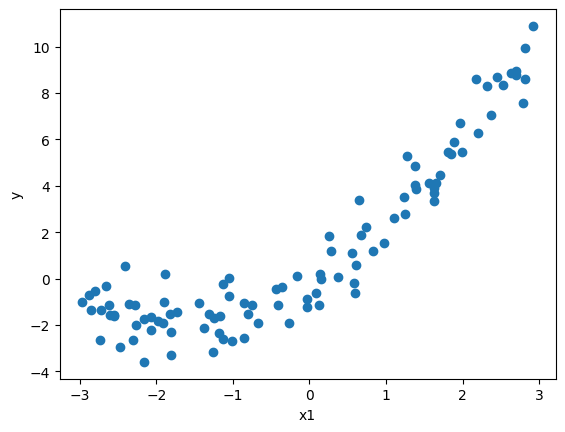

In [1]:
import numpy as np
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + 2 * X + np.random.randn(m , 1)

import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('x1')
plt.ylabel('y');

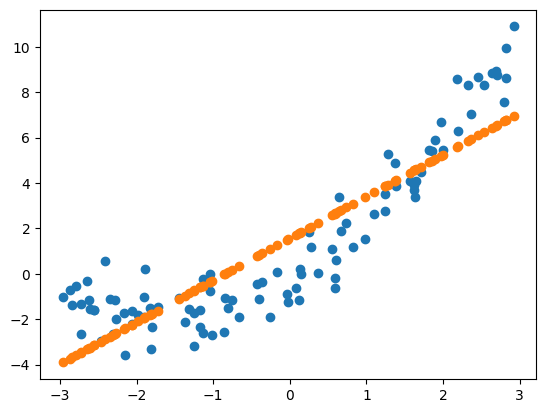

In [2]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

lr_pred = lr.predict(X)

plt.scatter(X, y)
plt.scatter(X, lr_pred)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

poly   = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [4]:
lr_poly = LinearRegression()
lr_poly.fit(X_poly, y)

LinearRegression()

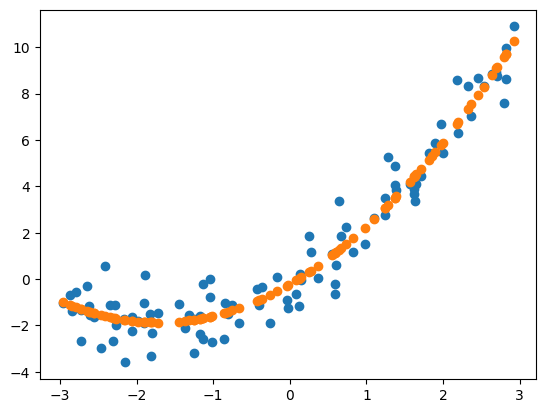

In [5]:
plt.scatter(X, y)
plt.scatter(X, lr_poly.predict(X_poly))

In [6]:
import pandas as pd

np.random.seed(42)
m  = 100
X1 = 6 * np.random.rand(m, 1) - 3
X2 = 3.2 * np.random.rand(m, 1) - 1

y  = 1.3 * X1 ** 2 + 0.5 * X ** 2 + 2 * X1 * X2 + np.random.randn(m , 1)

df = pd.DataFrame({
    'X1': X1.ravel(),
    'X2': X2.ravel(),
    'y': y.ravel()
})
df.head()

,X1,X2,y
0,-0.752759,-0.899427,1.694043
1,2.704286,1.036513,19.002002
2,1.391964,0.005939,3.797220
3,0.591951,0.627426,0.659190
4,-2.063888,1.904213,1.672952


In [7]:
from sklearn.metrics import r2_score

X = df.drop(columns='y', axis=1).copy()
y = df['y'].copy()

lr = LinearRegression()
lr.fit(X, y)

print(f'R² -> {r2_score(y, lr.predict(X))}')

R² -> 0.06014739226422172


In [8]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit_transform(X)

X_poly = pd.DataFrame(poly.fit_transform(X), columns=['X1', 'X2', 'X1²', 'X1X2', 'X2²'])
X_poly.head()

,X1,X2,X1²,X1X2,X2²
0,-0.752759,-0.899427,0.566647,0.677052,0.808968
1,2.704286,1.036513,7.313162,2.803028,1.074360
2,1.391964,0.005939,1.937563,0.008267,0.000035
3,0.591951,0.627426,0.350406,0.371406,0.393664
4,-2.063888,1.904213,4.259634,-3.930082,3.626026


In [9]:
lr_poly = LinearRegression()
lr_poly.fit(X_poly, y)

LinearRegression()

In [10]:
print(f'Poly R2 -> {r2_score(y, lr_poly.predict(X_poly))}')

Poly R2 -> 0.9756123530206587
